In [1]:
'''
(SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, 
regression, and even outlier detection. 
'''

'\n(SVM) is a very powerful and versatile Machine Learning model, capable of performing linear or nonlinear classification, \nregression, and even outlier detection. \n'

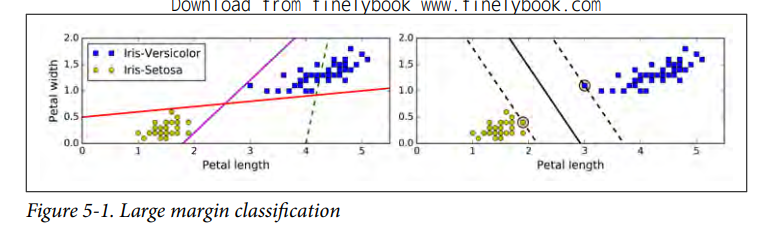

*** Left Figure 5-1 
 *** dashed line: classifies data very poorly
 *** purple & Red line: classifies data correctly but is overfitting

*** Right Figure 5-1: this line not only separates the two classes but also stays as far away from the
closest training instances as possible. 

In [2]:
'''
SVMs are sensitive to the feature scales, as you can see in
Figure 5-2
'''

'\nSVMs are sensitive to the feature scales, as you can see in\nFigure 5-2\n'

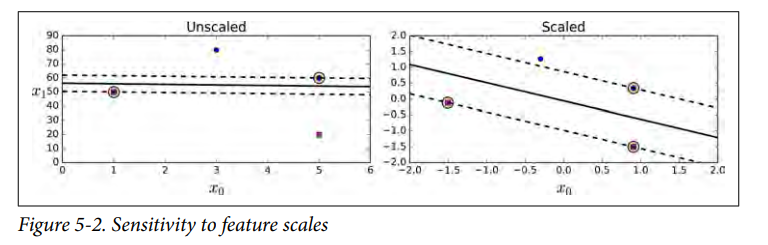

In [3]:
'''
If your SVM model is overfitting, you can try regularizing it by reducing C.
'''

'\nIf your SVM model is overfitting, you can try regularizing it by reducing C.\n'

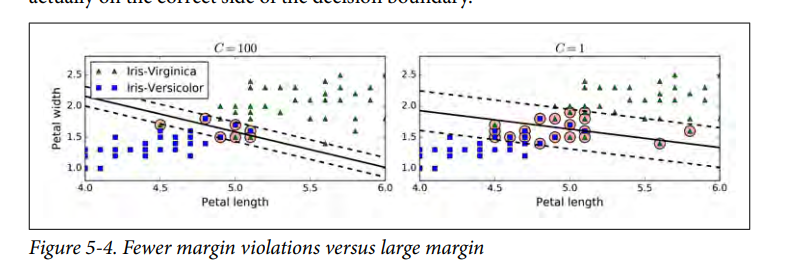

In [4]:
'''
Scikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the LinearSVC class
with C = 0.1 and the hinge loss Linear SVM Classification Download from finelybook www.finelybook.com function, described 
shortly) to detect Iris-Virginica flowers.
'''

'\nScikit-Learn code loads the iris dataset, scales the features, and then trains a linear SVM model (using the LinearSVC class\nwith C = 0.1 and the hinge loss Linear SVM Classification Download from finelybook www.finelybook.com function, described \nshortly) to detect Iris-Virginica flowers.\n'

In [5]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])


array([1.])

### Nonlinear SVM Classification

In [6]:
#One approach to handle non-linear datasets is to add more features,such as polynomial features.
# In some cases this can result in a linearly separable dataset.
# a simple dataset with just one feature x1. This dataset is not linearly separable, as you can see. But if you add a second fea‐
#ture x2 = (x1)2, the resulting 2D dataset is perfectly linearly separable.


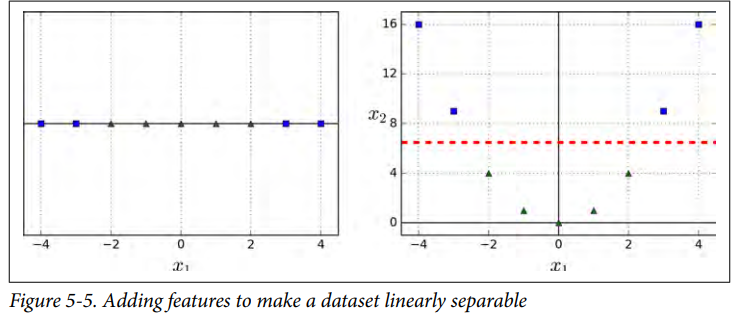

In [7]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polynomial_svm_clf = Pipeline((
 ("poly_features", PolynomialFeatures(degree=3)),
 ("scaler", StandardScaler()),
 ("svm_clf", LinearSVC(C=10, loss="hinge"))
 ))
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

### Polynomial Kernel

In [8]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
 ))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

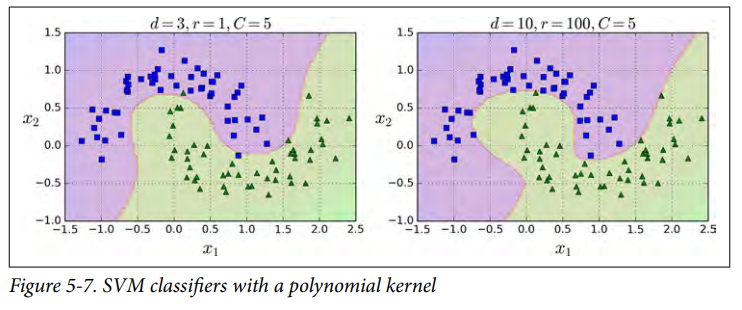

In [9]:
'''
*The hyperparameter coef0 controls how much the model is influenced by high degree polynomials versus low-degree polynomials.
*To find right set of hyperparameter values use a grid search.
*First do a coarse grid search and then a finer grid search around the best values found.
'''

'\n*The hyperparameter coef0 controls how much the model is influenced by high degree polynomials versus low-degree polynomials.\n*To find right set of hyperparameter values use a grid search.\n*First do a coarse grid search and then a finer grid search around the best values found.\n'

### Cost function(for SVM classifier)

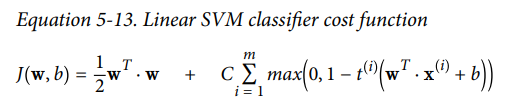

In [10]:
'''
The first sum in the cost function will push the model to have a small weight vector w, leading to a larger margin.
\The second sum computes the total of all margin violations. 
'''

'\nThe first sum in the cost function will push the model to have a small weight vector w, leading to a larger margin.\n\\The second sum computes the total of all margin violations. \n'

### * Hinge Loss

In [11]:
'''
The function max(0, 1 – t) is called the hinge loss function (represented below). It is equal to 0 when t ≥ 1. Its derivative (slope) is equal to –1 if t < 1 and 0 if t > 1. It is not
differentiable at t = 1,
'''

'\nThe function max(0, 1 – t) is called the hinge loss function (represented below). It is equal to 0 when t ≥ 1. Its derivative (slope) is equal to –1 if t < 1 and 0 if t > 1. It is not\ndifferentiable at t = 1,\n'

### Gaussian RBF Kernel


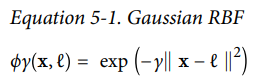

* Gausian RBF is a bell-shaped function varying from 0-1.
* Let’s take the one-dimensional dataset and add two landmarks to it at x1= –2 and x1= 1.Let’s define the similarity function to 
  be the Gaussian Radial Basis Function (RBF) with γ = 0.3.
* Lets compute the new features.For example lets look at the instance x1=-1.
* It is located at a distance of 1 from the first landmark, and 2 from the second landmark. Therefore its new features are x2=   exp (–0.3 × 12) ≈ 0.74 and x3= exp (–0.3 × 22) ≈ 0.30.


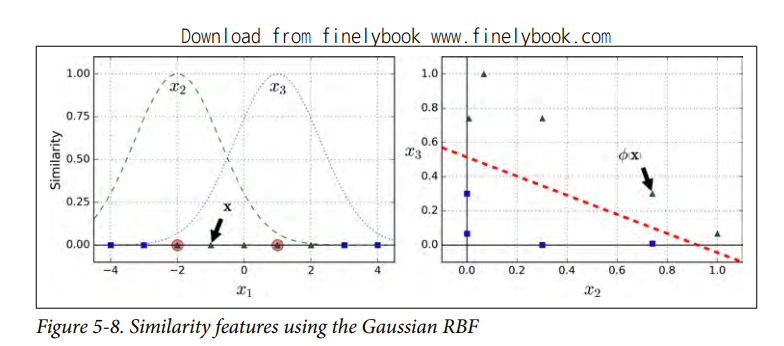

In [12]:
rbf_kernel_svm_clf = Pipeline((("scaler", StandardScaler()),("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

### which kernel to choose
* With so many kernels to choose from, how can you decide which one to use? 
* As a rule of thumb, you should always try the linear kernel first (remember that LinearSVC is much faster than SVC(kernel="linear")), especially if the training set is very large or if it has plenty of features.
* If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases.
* Then if you have spare time and computing power, you can also experiment with a few other kernels using cross-validation and grid search, especially if there are kernels specialized for your training set’s data structure.


### Computational Complexity
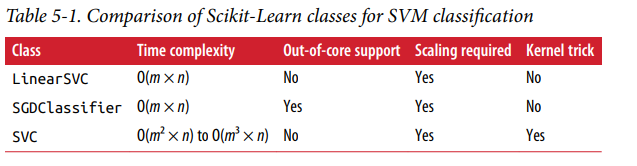

### SVM Regression

* SVM Classification: tries to fit the largest pos‐sible street between two classes while limiting margin violations.
* SVM Regression:SVM Regression tries to fit as many instances as possible on the street while limiting margin violations.
* The width of the street is controlled by a hyperparameter ϵ.
* The objective function of SVM Classification and SVM Regression is reversed.

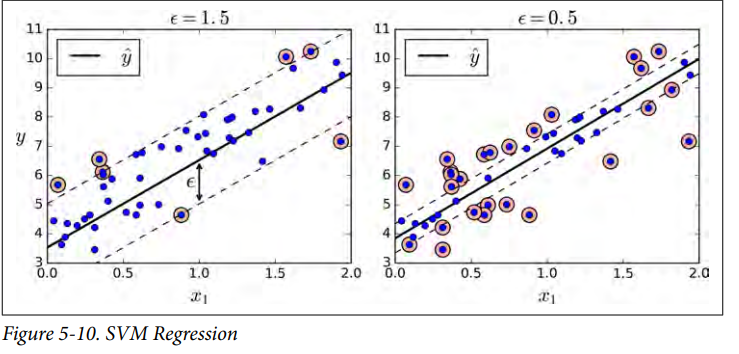

In [13]:
# Linear Regression
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5)

In [14]:
#Ploynomial Regression
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

SVR(C=100, degree=2, kernel='poly')

## Q& A

### Q1 what is the fundamental idea behind SVM?
* Support Vector Machines (SVMs) are a class of supervised machine learning algorithms that can be used for classification and regression analysis. The fundamental idea behind SVMs is to find the optimal hyperplane that separates the data points in the feature space into different classes.

### Q2 What is a support vector?
* In a binary classification problem, SVMs aim to find a hyperplane that maximizes the margin, i.e., the distance between the hyperplane and the closest data points from each class. The data points that are closest to the hyperplane are called support vectors.

### Q3 Why is it important to scale the inputs when using SVMs?
* SVMs are extremely sensitive to the scale of input features.When the features in the data have different scales, the SVM may give undue importance to the features with larger scales, while ignoring the features with smaller scales. This can lead to poor performance of the SVM, as it may fail to capture the true patterns in the data.

### Q4 Can an SVM classifier output a confidence score when it classifies an instance?What about a probability?
* Yes, an SVM classifier can output a confidence score when it classifies an instance, but it does not output a probability directly.

* In SVMs, the decision boundary is defined by a hyperplane, and the distance between the hyperplane and a test point is used to make predictions. The sign of this distance is used to assign the test point to one of two classes, and the magnitude of the distance is a measure of confidence in the classification.

* The distance between the hyperplane and a test point is called the margin, and the larger the margin, the greater the confidence in the classification. Therefore, the margin can be used as a confidence score for an SVM classifier.